In [20]:
import pandas as pd
import yfinance as yf
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [23]:
data = yf.download('5398.KL').reset_index()

[*********************100%***********************]  1 of 1 completed

C:\Users\Zac\anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


In [24]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4.275,4.600,4.275,4.525,2.269454,1728000
1,2000-01-04,4.550,4.750,4.550,4.625,2.319607,1426000
2,2000-01-05,4.525,4.600,4.300,4.575,2.294531,1746000
3,2000-01-06,4.625,4.675,4.600,4.650,2.347540,1268000
4,2000-01-07,4.650,4.650,4.650,4.650,2.347540,0
...,...,...,...,...,...,...,...
5557,2022-03-07,3.140,3.220,3.100,3.120,3.120000,3253000
5558,2022-03-08,3.080,3.100,3.030,3.060,3.060000,1563000
5559,2022-03-09,3.060,3.150,3.060,3.110,3.110000,2289500
5560,2022-03-10,3.120,3.250,3.120,3.210,3.210000,5421000


In [25]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5562.000000,5562.000000,5562.000000,5562.000000,5562.000000,5.562000e+03
mean,3.411231,3.449224,3.372413,3.411660,2.592934,4.775373e+06
std,1.031453,1.037301,1.024872,1.031517,1.138825,6.456057e+06
min,1.300000,1.400000,1.250000,1.350000,0.853596,0.000000e+00
25%,2.625000,2.670000,2.600000,2.625000,1.497587,1.661625e+06
50%,3.300000,3.345000,3.250000,3.300000,2.635177,3.321800e+06
75%,4.250000,4.317500,4.175000,4.250000,3.620285,5.950525e+06
max,6.000000,6.000000,5.850000,5.900000,4.877608,1.532165e+08


In [26]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:>

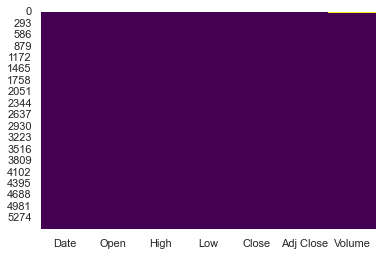

In [27]:
data2 = data.copy()
data2.iloc[1:50,data2.columns.get_loc('Volume')] = None
sns.heatmap(data2.isnull(),cbar=False,cmap = 'viridis') # to check null values

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do, is add new variables to our dataset that represents the difference between those values.

<AxesSubplot:>

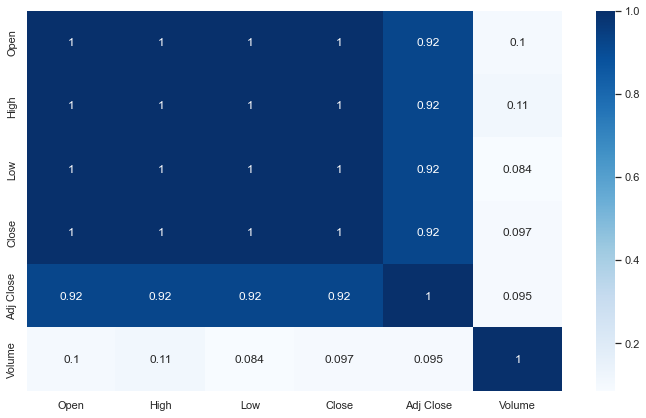

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap='Blues', annot= True)

In [33]:
data['open-high'] = data['Open']-data['High']
data['open-low'] = data['Open'] - data['Low']
data['close-high'] = data['Close']-data['High']
data['close-low'] = data['Close'] - data['Low']
data['high-low'] = data['High'] - data['Low']
data['open-close'] = data['Open'] - data['Close']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,2000-01-03,4.275,4.600,4.275,4.525,2.269454,1728000,-0.325,0.000,-0.075,0.250,0.325,-0.250
1,2000-01-04,4.550,4.750,4.550,4.625,2.319607,1426000,-0.200,0.000,-0.125,0.075,0.200,-0.075
2,2000-01-05,4.525,4.600,4.300,4.575,2.294531,1746000,-0.075,0.225,-0.025,0.275,0.300,-0.050
3,2000-01-06,4.625,4.675,4.600,4.650,2.347540,1268000,-0.050,0.025,-0.025,0.050,0.075,-0.025
4,2000-01-07,4.650,4.650,4.650,4.650,2.347540,0,0.000,0.000,0.000,0.000,0.000,0.000


<AxesSubplot:>

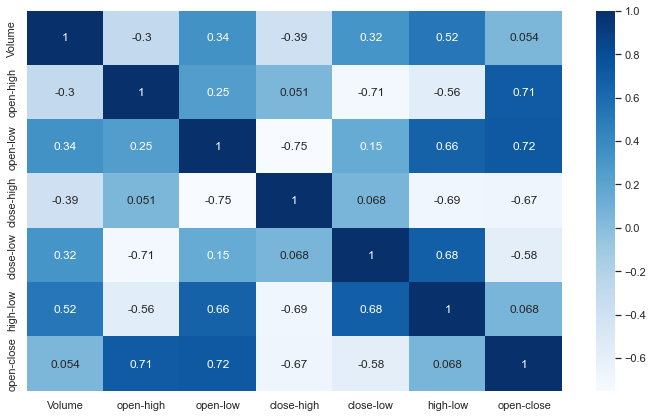

In [34]:
data2 = data.copy()
data2 = data2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(12,7))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

The stock market is all about numbers. Understanding these numbers and finding the pattern is an art, and we the data analysts are the artists. The main variable we are going to focus on in this dataset is the ‘Volume’. Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers. Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

The close-high shows the most negative correlation with the volume feature. This means that the greater the difference between the closing value of the stock and the highest value of stock that day, the greater will be the stocks traded that day. As there is no information about the number of buyers and sellers, we can only guess that a high difference in closing and highest value of the stock might attract more buyers. Whereas a fewer difference may attract more sellers.

<AxesSubplot:xlabel='close-high', ylabel='Volume'>

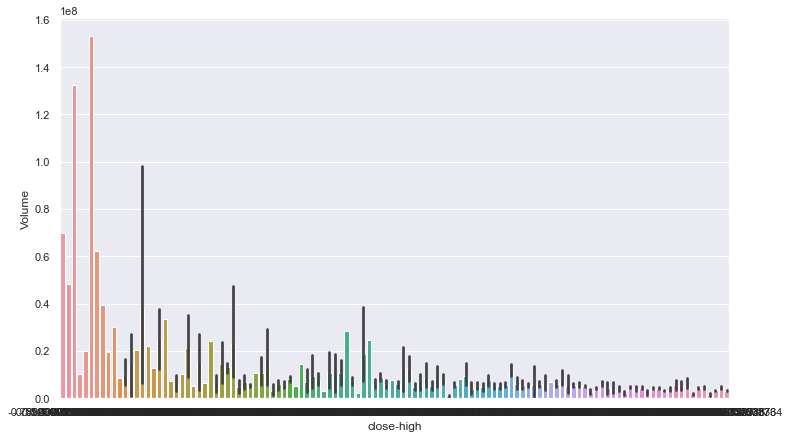

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x = "close-high", y="Volume")

The ‘high-low’ feature shows the maximum value of correlation with the ‘volume’ feature. Thus we can think that a greater fluctuation in the stock price may be a reason behind more transactions of stocks that day.

From the below graph you can observe the volume of stocks traded is high for larger values of high-low.

<AxesSubplot:xlabel='high-low', ylabel='Volume'>

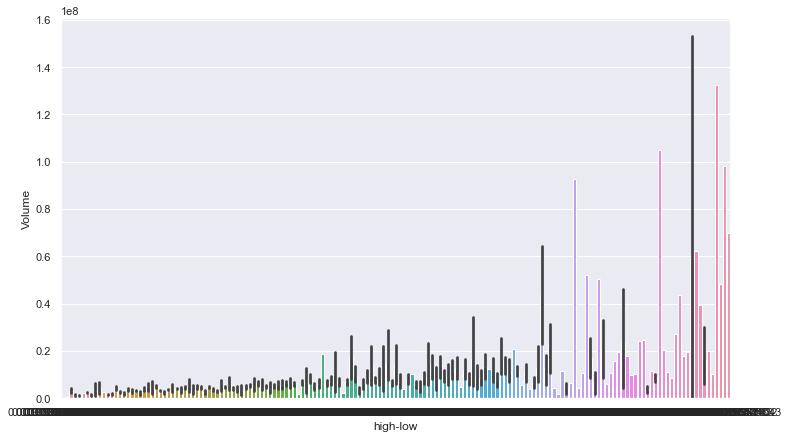

In [37]:
plt.figure(figsize=(12,7))
sns.barplot(data=data, x = "high-low", y="Volume")

In [39]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,2000-01-03,4.275,4.600,4.275,4.525,2.269454,1728000,-0.325,0.000,-0.075,0.250,0.325,-0.250
1,2000-01-04,4.550,4.750,4.550,4.625,2.319607,1426000,-0.200,0.000,-0.125,0.075,0.200,-0.075
2,2000-01-05,4.525,4.600,4.300,4.575,2.294531,1746000,-0.075,0.225,-0.025,0.275,0.300,-0.050
3,2000-01-06,4.625,4.675,4.600,4.650,2.347540,1268000,-0.050,0.025,-0.025,0.050,0.075,-0.025
4,2000-01-07,4.650,4.650,4.650,4.650,2.347540,0,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,2022-03-07,3.140,3.220,3.100,3.120,3.120000,3253000,-0.080,0.040,-0.100,0.020,0.120,0.020
5558,2022-03-08,3.080,3.100,3.030,3.060,3.060000,1563000,-0.020,0.050,-0.040,0.030,0.070,0.020
5559,2022-03-09,3.060,3.150,3.060,3.110,3.110000,2289500,-0.090,0.000,-0.040,0.050,0.090,-0.050
5560,2022-03-10,3.120,3.250,3.120,3.210,3.210000,5421000,-0.130,0.000,-0.040,0.090,0.130,-0.090


(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

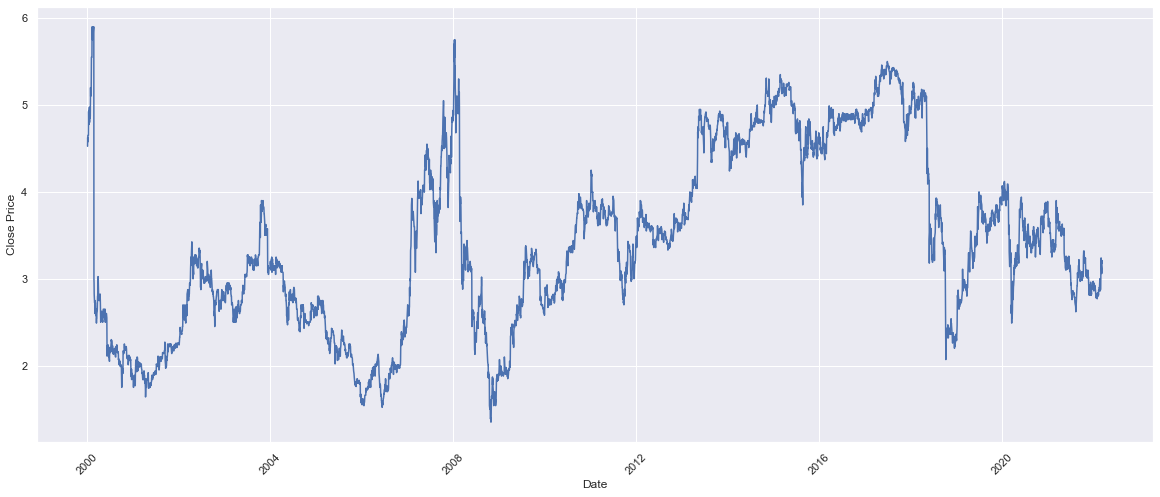

In [40]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=data)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [42]:
data['Daily Lag'] = data['Close'].shift(1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close,Daily Lag
0,2000-01-03,4.275,4.600,4.275,4.525,2.269454,1728000,-0.325,0.000,-0.075,0.250,0.325,-0.250,NaN
1,2000-01-04,4.550,4.750,4.550,4.625,2.319607,1426000,-0.200,0.000,-0.125,0.075,0.200,-0.075,4.525
2,2000-01-05,4.525,4.600,4.300,4.575,2.294531,1746000,-0.075,0.225,-0.025,0.275,0.300,-0.050,4.625
3,2000-01-06,4.625,4.675,4.600,4.650,2.347540,1268000,-0.050,0.025,-0.025,0.050,0.075,-0.025,4.575
4,2000-01-07,4.650,4.650,4.650,4.650,2.347540,0,0.000,0.000,0.000,0.000,0.000,0.000,4.650


In [43]:
data['Daily Returns'] = (data['Daily Lag']/data['Close']) -1
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close,Daily Lag,Daily Returns
0,2000-01-03,4.275,4.600,4.275,4.525,2.269454,1728000,-0.325,0.000,-0.075,0.250,0.325,-0.250,NaN,NaN
1,2000-01-04,4.550,4.750,4.550,4.625,2.319607,1426000,-0.200,0.000,-0.125,0.075,0.200,-0.075,4.525,-0.021622
2,2000-01-05,4.525,4.600,4.300,4.575,2.294531,1746000,-0.075,0.225,-0.025,0.275,0.300,-0.050,4.625,0.010929
3,2000-01-06,4.625,4.675,4.600,4.650,2.347540,1268000,-0.050,0.025,-0.025,0.050,0.075,-0.025,4.575,-0.016129
4,2000-01-07,4.650,4.650,4.650,4.650,2.347540,0,0.000,0.000,0.000,0.000,0.000,0.000,4.650,0.000000


<AxesSubplot:>

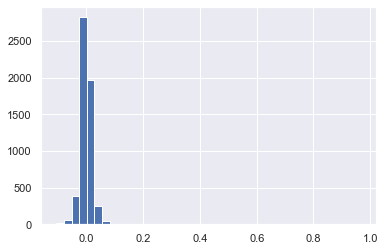

In [47]:
data['Daily Returns'].hist(bins=40)

In [48]:
mean = data['Daily Returns'].mean()
std = data['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 0.0003458510686008996
Std deviation = 0.02532098508121967


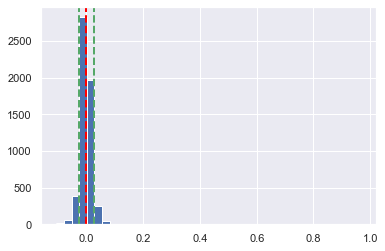

In [50]:
data['Daily Returns'].hist(bins=40)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)

#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

Kurtosis tells you the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get. In our case, the value is positive, so this indicates that the chance of ‘extreme’ values are rare. (Note: the right way to actually ascertain this is using Z-value which I will show in another separarte tutorial!)

In [51]:
data['Daily Returns'].kurtosis()

396.21546670856844